In [13]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
import matplotlib.pyplot as plt

In [14]:
def generate_grid(): 
    # We set the range of the grid
    x_min, x_max = 0, 100
    y_min, y_max = -42.5, 42.5

    X,Y = np.meshgrid(np.arange(x_min, x_max + 2.5, 2.5),
                      np.arange(y_min, y_max + 2.5, 2.5))
    
    return X,Y

In [15]:
input_file = os.path.join('data\datasets','2019.csv')
df = pd.read_csv(input_file)

In [16]:
sub_df = df[df['x_coordinate'] > 0]

In [17]:
sub_df.head()

,period,period_type,period_time,gameID,attacking_team_id,attacking_team_name,play_type,shooter,goalie,shot_type,x_coordinate,y_coordinate,empty_net,strength,home_team
0,1,REGULAR,00:25,2019020001,9,Ottawa Senators,Goal,Brady Tkachuk,Frederik Andersen,Tip-In,85.0,-1.0,False,Even,Toronto Maple Leafs
2,1,REGULAR,03:23,2019020001,9,Ottawa Senators,Shot,Dylan DeMelo,Frederik Andersen,Snap Shot,63.0,-6.0,NaN,NaN,Toronto Maple Leafs
12,1,REGULAR,07:59,2019020001,9,Ottawa Senators,Shot,Colin White,Frederik Andersen,Snap Shot,78.0,-5.0,NaN,NaN,Toronto Maple Leafs
13,1,REGULAR,08:05,2019020001,9,Ottawa Senators,Shot,Thomas Chabot,Frederik Andersen,Snap Shot,47.0,23.0,NaN,NaN,Toronto Maple Leafs
15,1,REGULAR,09:08,2019020001,9,Ottawa Senators,Shot,Anthony Duclair,Frederik Andersen,Backhand,83.0,-4.0,NaN,NaN,Toronto Maple Leafs


In [18]:
X,Y = generate_grid()

In [27]:
def shot_count_in_grid(X : np.array, Y : np.array, df : pd.DataFrame):
    counts = np.zeros([np.shape(X)[1], np.shape(X)[0]])
    step = X[0,1] - X[0,0]

    x_min, y_max = np.min(X), np.max(Y)

    for _,row in df.iterrows(): 
        x_coord = row['x_coordinate']
        y_coord = row['y_coordinate']

        x_index = int((x_coord - x_min) /step)
        y_index = int((y_max - y_coord) /step)

        counts[x_index,y_index] += 1

    return counts

In [28]:
matrix = shot_count_in_grid(X,Y,sub_df)

In [21]:
x_vector = X[0,:]
y_vector = Y[:,0]

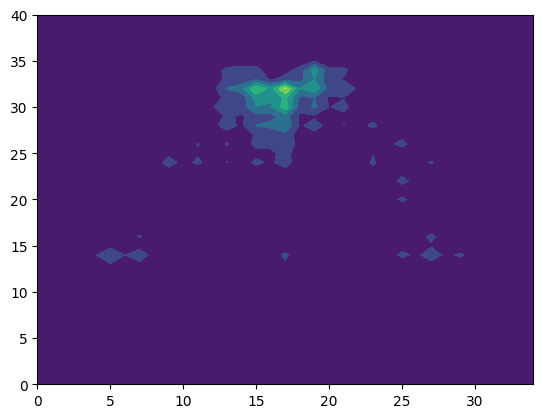

In [29]:
pic_path = os.path.join('./img','terrain_hockey.png')
img = plt.imread(pic_path)



cs = plt.contourf(matrix)
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()


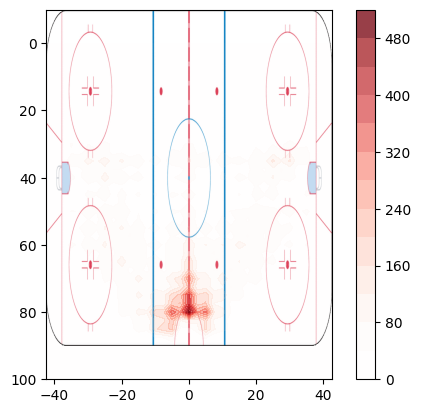

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image


def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap


#Use base cmap to create transparent
mycmap = transparent_cmap(plt.cm.Reds)

I = Image.open('./img/terrain_hockey.png')
y, x = np.mgrid[-10:90, -42.5:42.5]

#Plot image and overlay colormap
fig, ax = plt.subplots(1, 1)
ax.imshow(I, extent=[-42.5, 42.5, 90, -10])
cb = ax.contourf(y_vector, x_vector, matrix, 15, cmap=mycmap)
plt.colorbar(cb)
plt.show()